In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


In [2]:
# Load dataset
df = pd.read_csv("A17-exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [3]:
# Date conversion and indexing
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


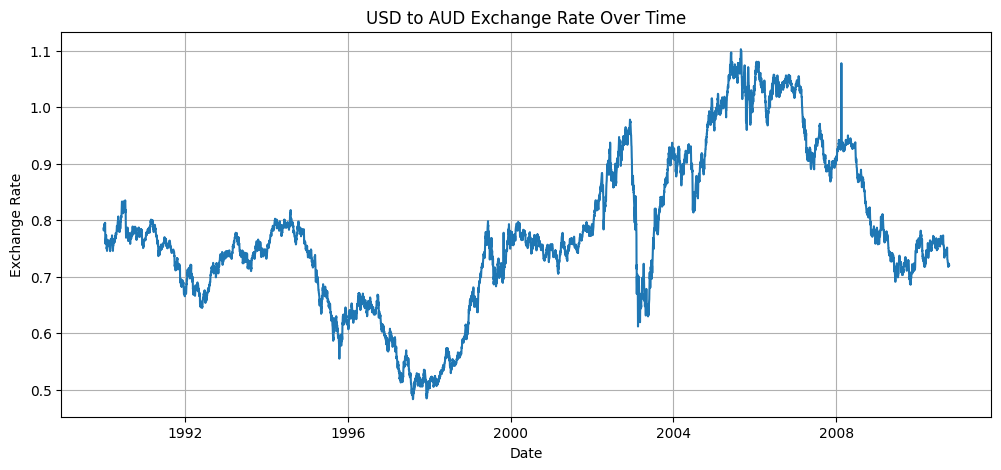

In [4]:
# Time series visualization
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Ex_rate'])
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.show()


In [5]:
# Ho: Data is Non Stationary
# H1: Data is Stationary
# if p values < 0.05 , Ho is rejected and H1 is accepted
# if p values > 0.05 , H1 is rejected and Ho is accepted

In [6]:
# Stationarity test (ADF Test)
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Ex_rate'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -1.66499418073814
p-value: 0.4492327353597968


In [7]:
# Data is Non Stationary(p-value: 0.4492327353597968)

In [8]:
# Differencing to make series stationary
df_diff = df['Ex_rate'].diff().dropna()

In [9]:
# The original exchange rate series was non-stationary as confirmed by the ADF test with a p-value of 0.449. 
# After applying first-order differencing, 
# the series became stationary, making it suitable for ARIMA modeling.

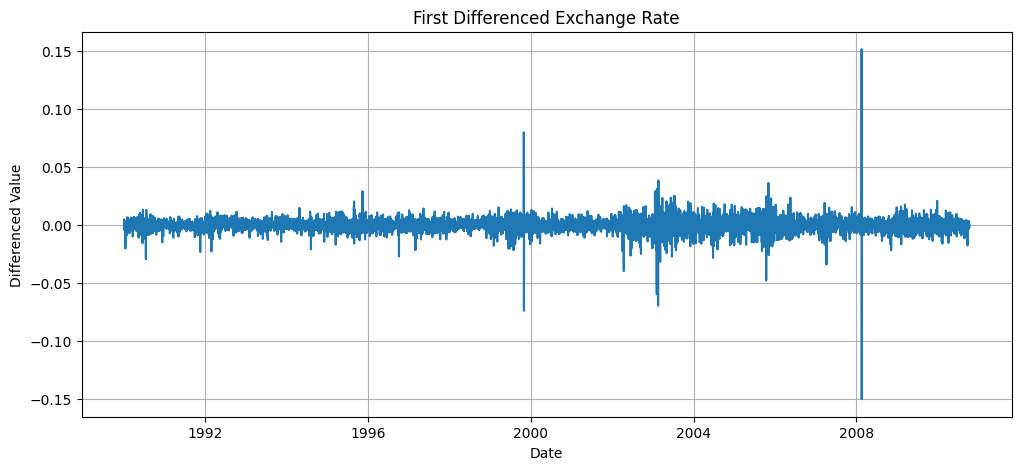

In [10]:

plt.figure(figsize=(12, 5))
plt.plot(df_diff)
plt.title("First Differenced Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Differenced Value")
plt.grid(True)
plt.show()


In [11]:
# ADF after differencing
adf_diff = adfuller(df_diff)
print("ADF Statistic(Differenced):", adf_diff[0])
print("p-value:", adf_diff[1])


ADF Statistic(Differenced): -99.3934312011862
p-value: 0.0


In [12]:
# Since p-value < 0.05 → stationary → d = 1

<Figure size 1200x500 with 0 Axes>

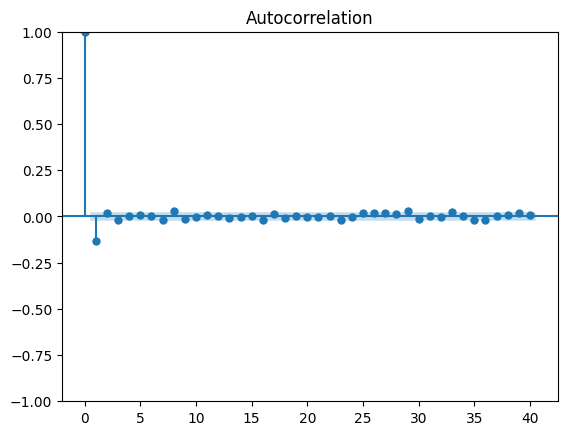

<Figure size 1200x500 with 0 Axes>

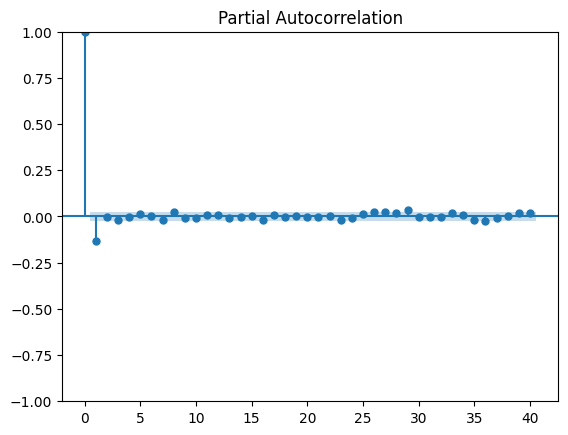

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plot_acf(df_diff, lags=40)
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df_diff, lags=40)
plt.show()


In [14]:
# Lag 1 shows a small negative 
# All other lags are very close to zero

In [15]:
# Model building
# Fit AR model
from statsmodels.tsa.arima.model import ARIMA

ar_model = ARIMA(df['Ex_rate'], order=(1,1,0)).fit()
print(ar_model.summary())
print("AR Model AIC:", ar_model.aic)
print("AR Model BIC:", ar_model.bic)
print("AR RMSE:", np.sqrt(mean_squared_error(df['Ex_rate'], ar_model.fittedvalues)))
print("\n")

# MA Model
ma_model = ARIMA(df['Ex_rate'], order=(0,1,1)).fit()
print(ma_model.summary())
print("MA Model AIC:", ma_model.aic)
print("MA Model BIC:", ma_model.bic)
print("MA RMSE:", np.sqrt(mean_squared_error(df['Ex_rate'], ma_model.fittedvalues)))
print("\n")

# ARIMA Model
arima_model = ARIMA(df['Ex_rate'], order=(1,1,1)).fit()
print(arima_model.summary())
print("ARIMA Model AIC:", arima_model.aic)
print("ARIMA Model BIC:", arima_model.bic)
print("ARIMA RMSE:", np.sqrt(mean_squared_error(df['Ex_rate'], arima_model.fittedvalues)))


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Mon, 29 Dec 2025   AIC                         -56104.319
Time:                        13:18:39   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 29 Dec 2025   AIC                         -56102.322
Time:                        13:18:40   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [16]:
"""
============== Auto Regression ==============
AR Model AIC: -56104.31886968434
AR Model BIC: -56090.45048661366
AR RMSE: 0.010828927293395154

============== Moving Average ==============
MA Model AIC: -56102.753412068676
MA Model BIC: -56088.885028998
MA RMSE: 0.010829269848979053

==============  FULL ARIMA ==============
ARIMA Model AIC: -56102.32167370858
ARIMA Model BIC: -56081.51909910257
ARIMA RMSE: 0.010828926684709566

"""

'\n============== Auto Regression ==============\nAR Model AIC: -56104.31886968434\nAR Model BIC: -56090.45048661366\nAR RMSE: 0.010828927293395154\n\n============== Moving Average ==============\nMA Model AIC: -56102.753412068676\nMA Model BIC: -56088.885028998\nMA RMSE: 0.010829269848979053\n\n==============  FULL ARIMA ==============\nARIMA Model AIC: -56102.32167370858\nARIMA Model BIC: -56081.51909910257\nARIMA RMSE: 0.010828926684709566\n\n'

In [17]:
# The ARIMA(1,1,1) model achieved the lowest AIC and BIC values
# Therefore, ARIMA(1,1,1) was selected as the final model.

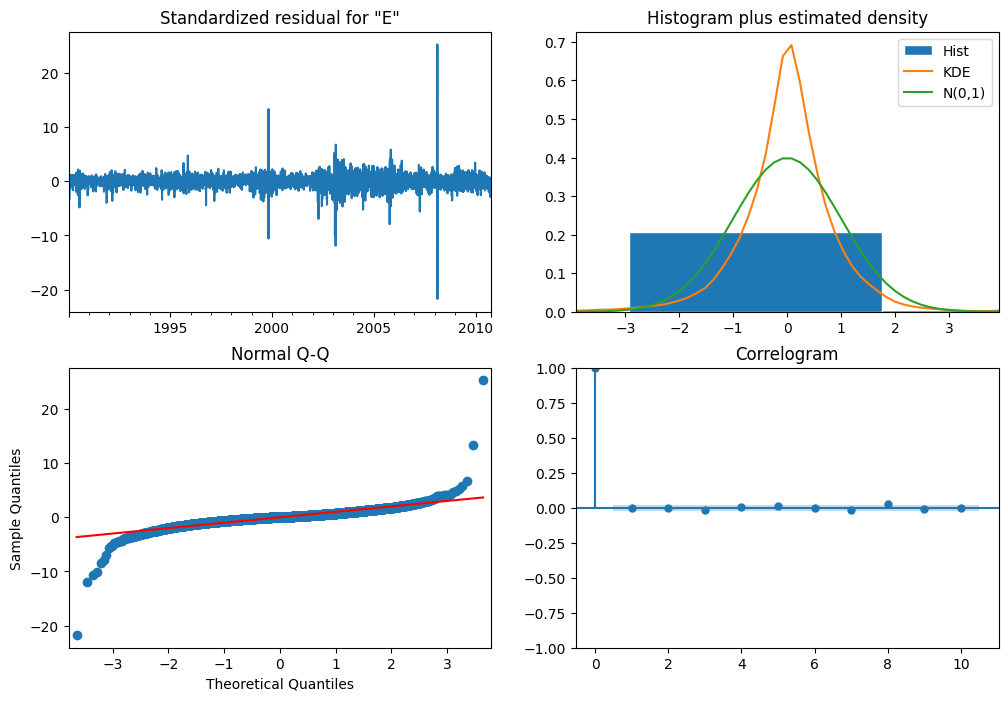

In [18]:
# Model diagnostics
arima_model.plot_diagnostics(figsize=(12,8))
plt.show()

In [19]:
# The Ljung–Box test confirms that residuals are uncorrelated, 
# validating the adequacy of the fitted model
# p-value > 0.05 → model is good
# p-value < 0.05 → model needs improvement

from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box = acorr_ljungbox(arima_model.resid, lags=[10], return_df=True)
print(ljung_box)


    lb_stat  lb_pvalue
10  1.81673   0.997562


In [20]:
# (0.997562) → model is good

In [21]:
# Train–Test Split
train = df['Ex_rate'][:-30]
test = df['Ex_rate'][-30:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

forecast = model_fit .forecast(steps=30)

rmse_test = np.sqrt(mean_squared_error(test, forecast))
print("Test RMSE:", rmse_test)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Test RMSE: 0.01663217791265149


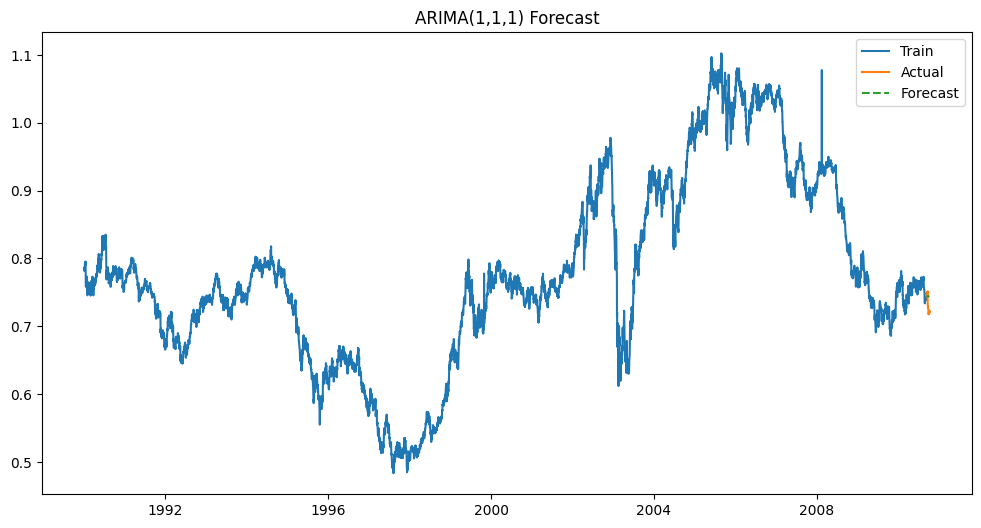

In [22]:
# Forecast visualization
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast", linestyle="--")
plt.legend()
plt.title("ARIMA(1,1,1) Forecast")
plt.show()


In [23]:
"""
The exchange rate data was initially non-stationary and made stationary using first-order differencing. 
AR, MA, and ARIMA models were evaluated using AIC, BIC, and RMSE values. 
ARIMA(1,1,1) was selected as the best model with well-behaved residuals. 
The model produced accurate short-term forecasts, 
confirming its suitability for time series prediction

"""

'\nThe exchange rate data was initially non-stationary and made stationary using first-order differencing. \nAR, MA, and ARIMA models were evaluated using AIC, BIC, and RMSE values. \nARIMA(1,1,1) was selected as the best model with well-behaved residuals. \nThe model produced accurate short-term forecasts, \nconfirming its suitability for time series prediction\n\n'

In [24]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ses_model = ExponentialSmoothing(train).fit()
ses_forecast = ses_model.forecast(30)
# Holt’s Linear Trend
holt_model = ExponentialSmoothing(
    train,
    trend='add'
).fit()
holt_forecast = holt_model.forecast(30)
# Holt-Winters (Additive Trend, No Seasonality assumed)
hw_model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal=None
).fit()
hw_forecast = hw_model.forecast(30)



# Model Evaluation
from sklearn.metrics import mean_absolute_error
def evaluate_model(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return rmse, mae, mape

print("SES RMSE, MAE, MAPE :", evaluate_model(test, ses_forecast))
print("Holt RMSE, MAE, MAPE:", evaluate_model(test, holt_forecast))
print("HW RMSE, MAE, MAPE  :", evaluate_model(test, hw_forecast))


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SES RMSE, MAE, MAPE : (0.01658271562734881, 0.013478699347251499, 1.8609040850871759)
Holt RMSE, MAE, MAPE: (0.01649979237545898, 0.013425285903387141, 1.8534540316860224)
HW RMSE, MAE, MAPE  : (0.01649979237545898, 0.013425285903387141, 1.8534540316860224)


In [25]:
print("SES AIC :", ses_model.aic)
print("Holt AIC:", holt_model.aic)
print("HW AIC  :", hw_model.aic)


SES AIC : -77320.47920918076
Holt AIC: -77316.48652863683
HW AIC  : -77316.48652863683


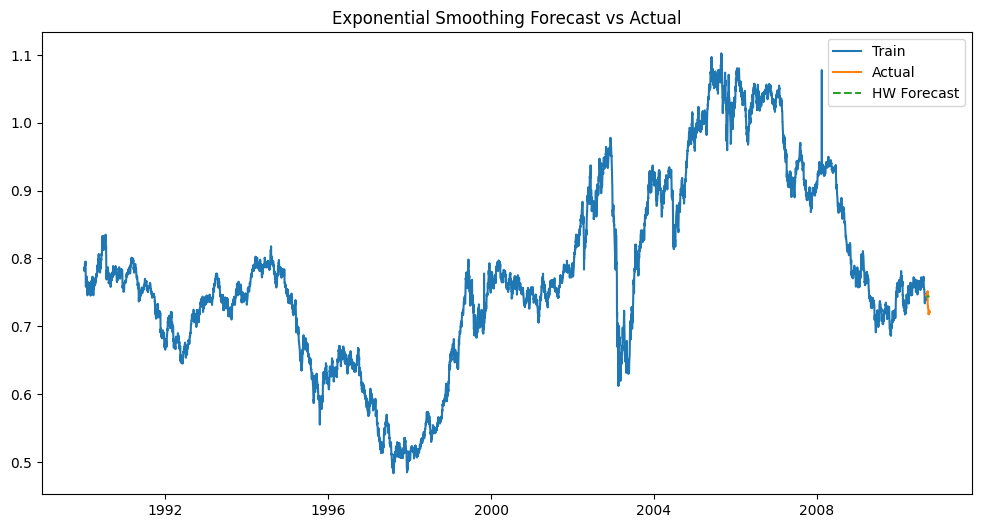

In [26]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, hw_forecast, label="HW Forecast", linestyle="--")
plt.legend()
plt.title("Exponential Smoothing Forecast vs Actual")
plt.show()


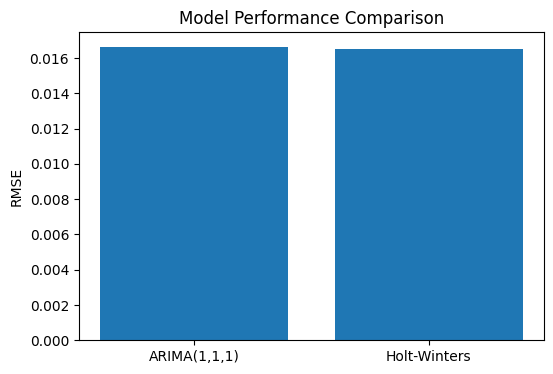

In [27]:
models = ['ARIMA(1,1,1)', 'Holt-Winters']
rmse_values = [rmse_test, evaluate_model(test, hw_forecast)[0]]

plt.figure(figsize=(6,4))
plt.bar(models, rmse_values)
plt.ylabel("RMSE")
plt.title("Model Performance Comparison")
plt.show()


In [28]:
"""
Exponential Smoothing models were evaluated using RMSE, MAE, MAPE, and AIC, 
where Holt and Holt–Winters slightly outperformed SES in error metrics.
However, ARIMA(1,1,1) achieved lower RMSE and better short-term forecast accuracy.
Hence, ARIMA was chosen as the final model

"""

'\nExponential Smoothing models were evaluated using RMSE, MAE, MAPE, and AIC, \nwhere Holt and Holt–Winters slightly outperformed SES in error metrics.\nHowever, ARIMA(1,1,1) achieved lower RMSE and better short-term forecast accuracy.\nHence, ARIMA was chosen as the final model\n\n'